In [1]:
pip install opencv_python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

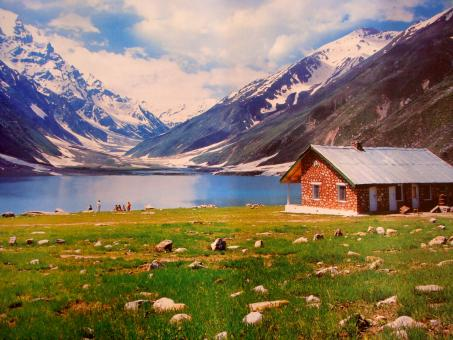

In [4]:
Image('./lake-cottage.jpg')

In [12]:
base_image = cv2.imread('./lake-cottage.jpg', cv2.IMREAD_COLOR)
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

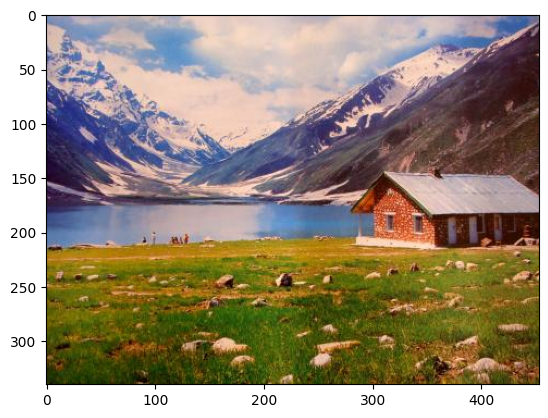

In [13]:
plt.imshow(base_image)

In [14]:
print(base_image.dtype)

uint8


In [15]:
matrix = np.ones(base_image.shape, base_image.dtype) * 50

In [16]:
base_image_brighter = cv2.add(base_image, matrix)
base_image_darker = cv2.subtract(base_image, matrix)

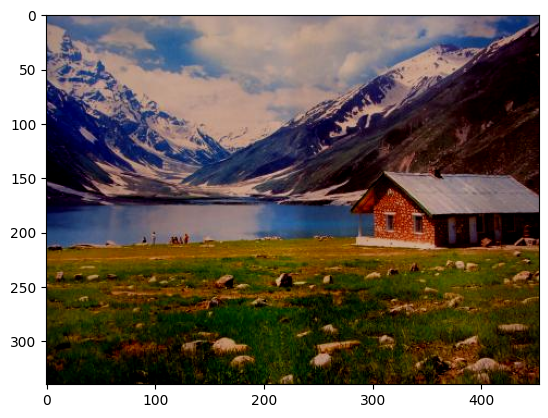

In [17]:
plt.imshow(base_image_darker)

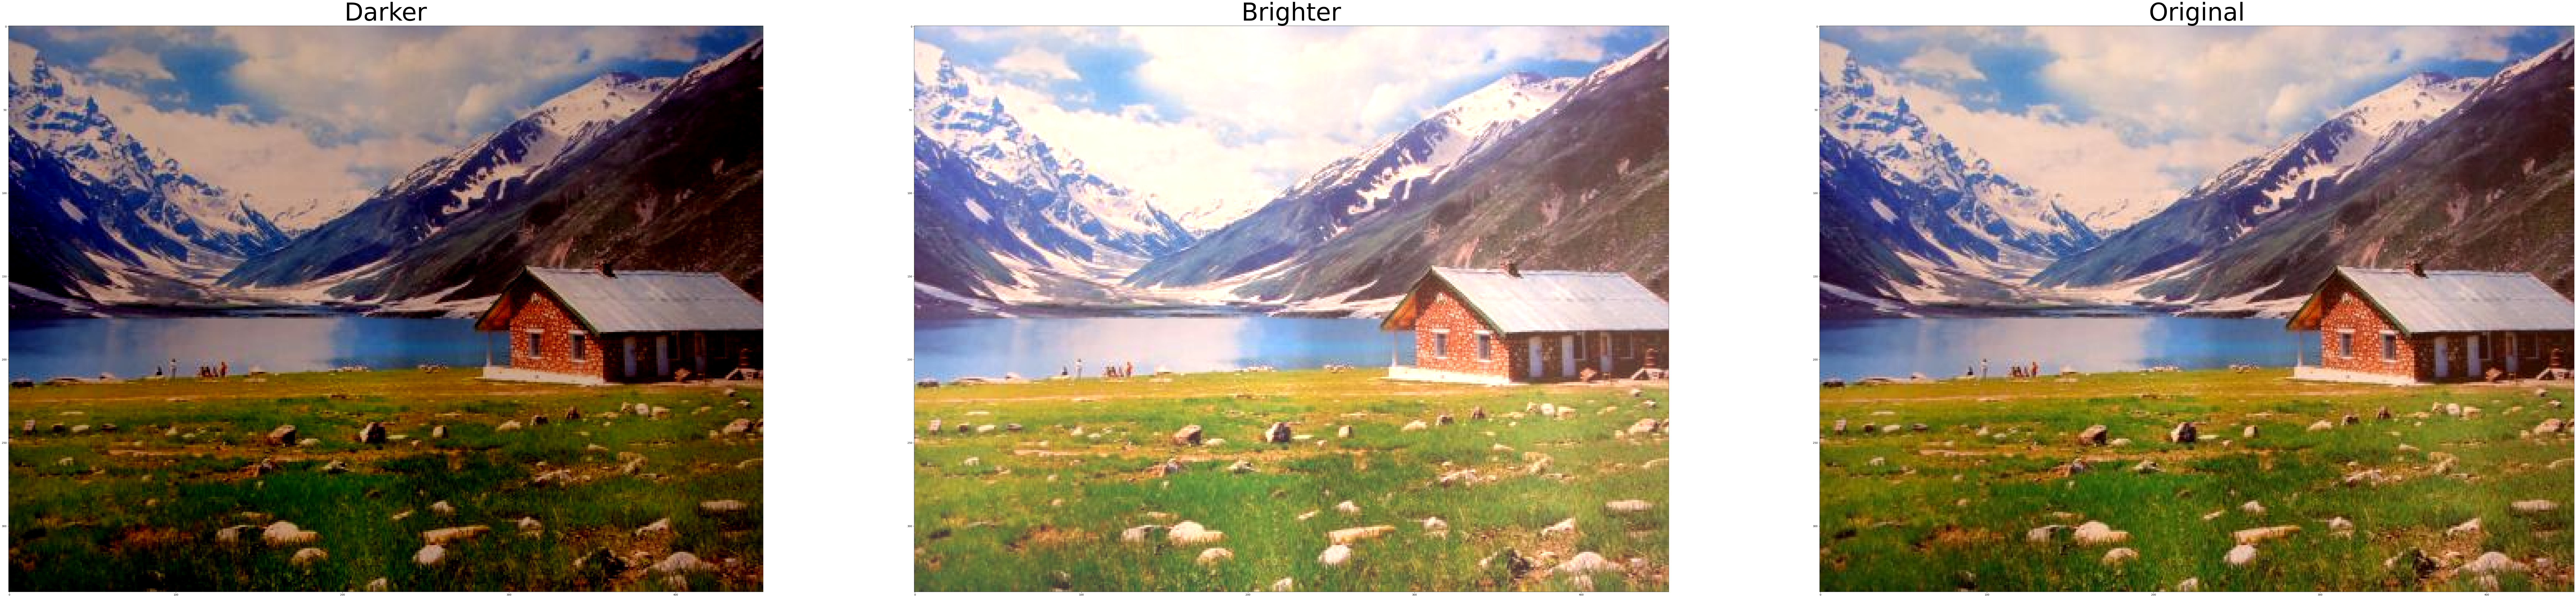

In [45]:
plt.figure(figsize=[180,50])
plt.subplot(131); plt.imshow(base_image_darker); plt.title("Darker", fontdict={'fontsize':96});
plt.subplot(132); plt.imshow(base_image_brighter); plt.title("Brighter", fontdict={'fontsize':96});
plt.subplot(133); plt.imshow(base_image); plt.title("Original", fontdict={'fontsize':96});


In [48]:
matrix_low_contrast = np.ones(base_image.shape) * 0.8
matrix_high_contrast = np.ones(base_image.shape) * 1.2

base_image_lower_contrast = np.uint8(cv2.multiply(np.float64(base_image), matrix_low_contrast))
base_image_higher_contrast = np.uint8(np.clip(cv2.multiply(np.float64(base_image), matrix_high_contrast), 0, 255))

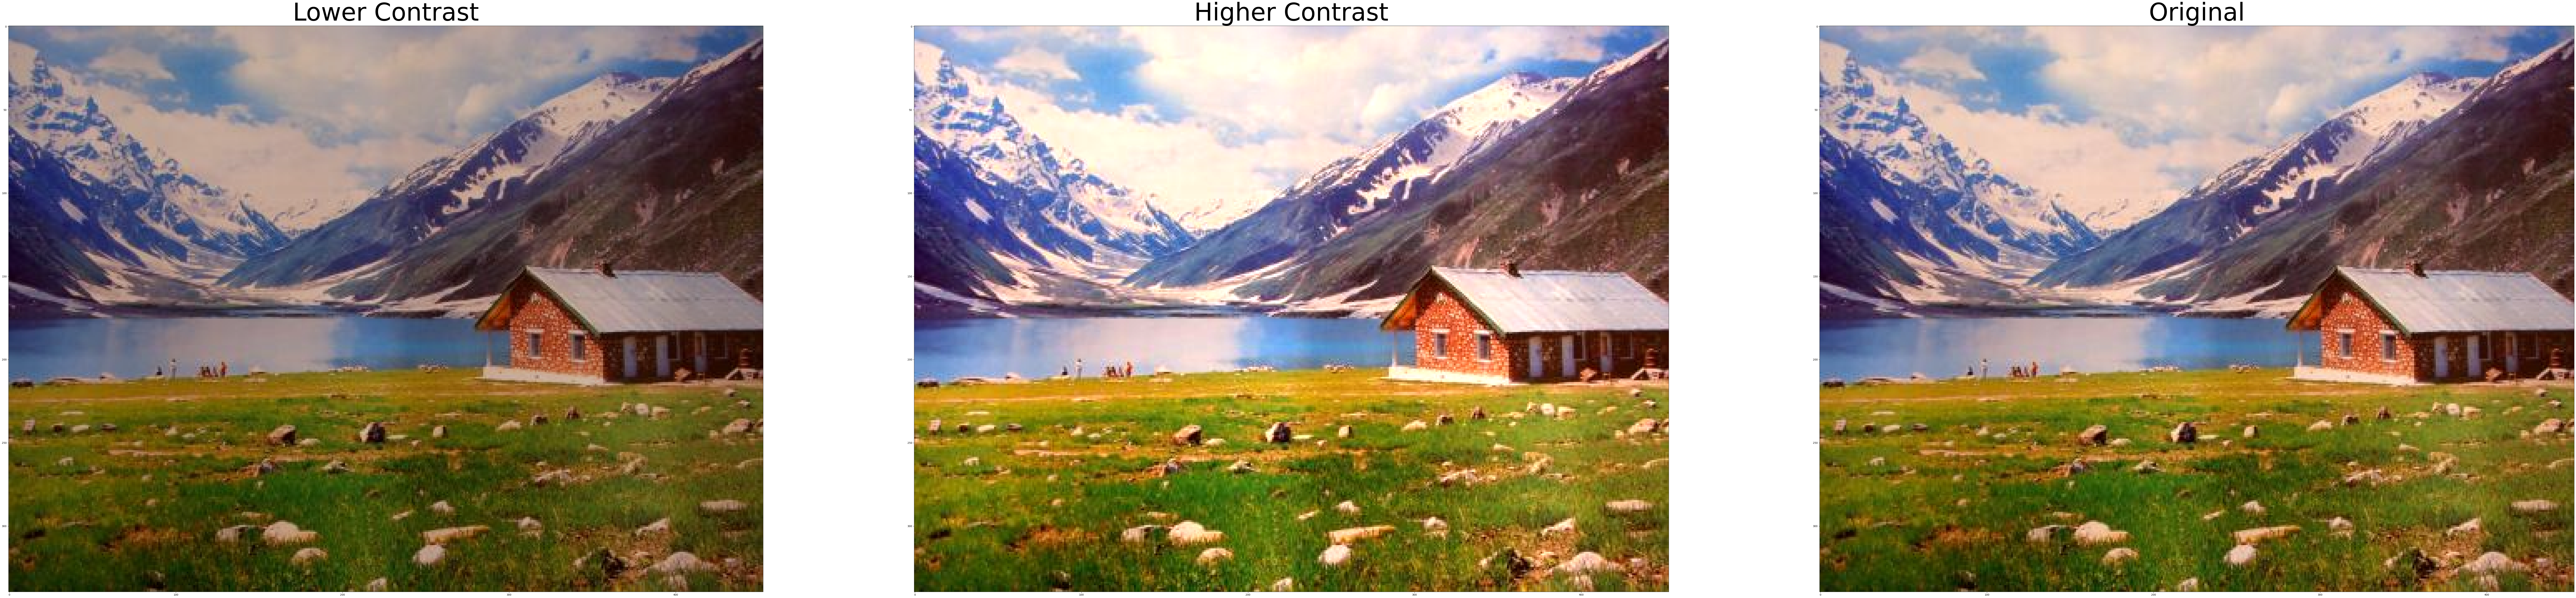

In [49]:
plt.figure(figsize=[180,50])
plt.subplot(131); plt.imshow(base_image_lower_contrast); plt.title("Lower Contrast", fontdict={'fontsize':96});
plt.subplot(132); plt.imshow(base_image_higher_contrast); plt.title("Higher Contrast", fontdict={'fontsize':96});
plt.subplot(133); plt.imshow(base_image); plt.title("Original", fontdict={'fontsize':96});

In [72]:
base_image_grayscale = cv2.imread('./lake-cottage.jpg', cv2.IMREAD_GRAYSCALE) 
retVal, image_thresholded = cv2.threshold(base_image_grayscale, 127, 255, cv2.THRESH_BINARY)

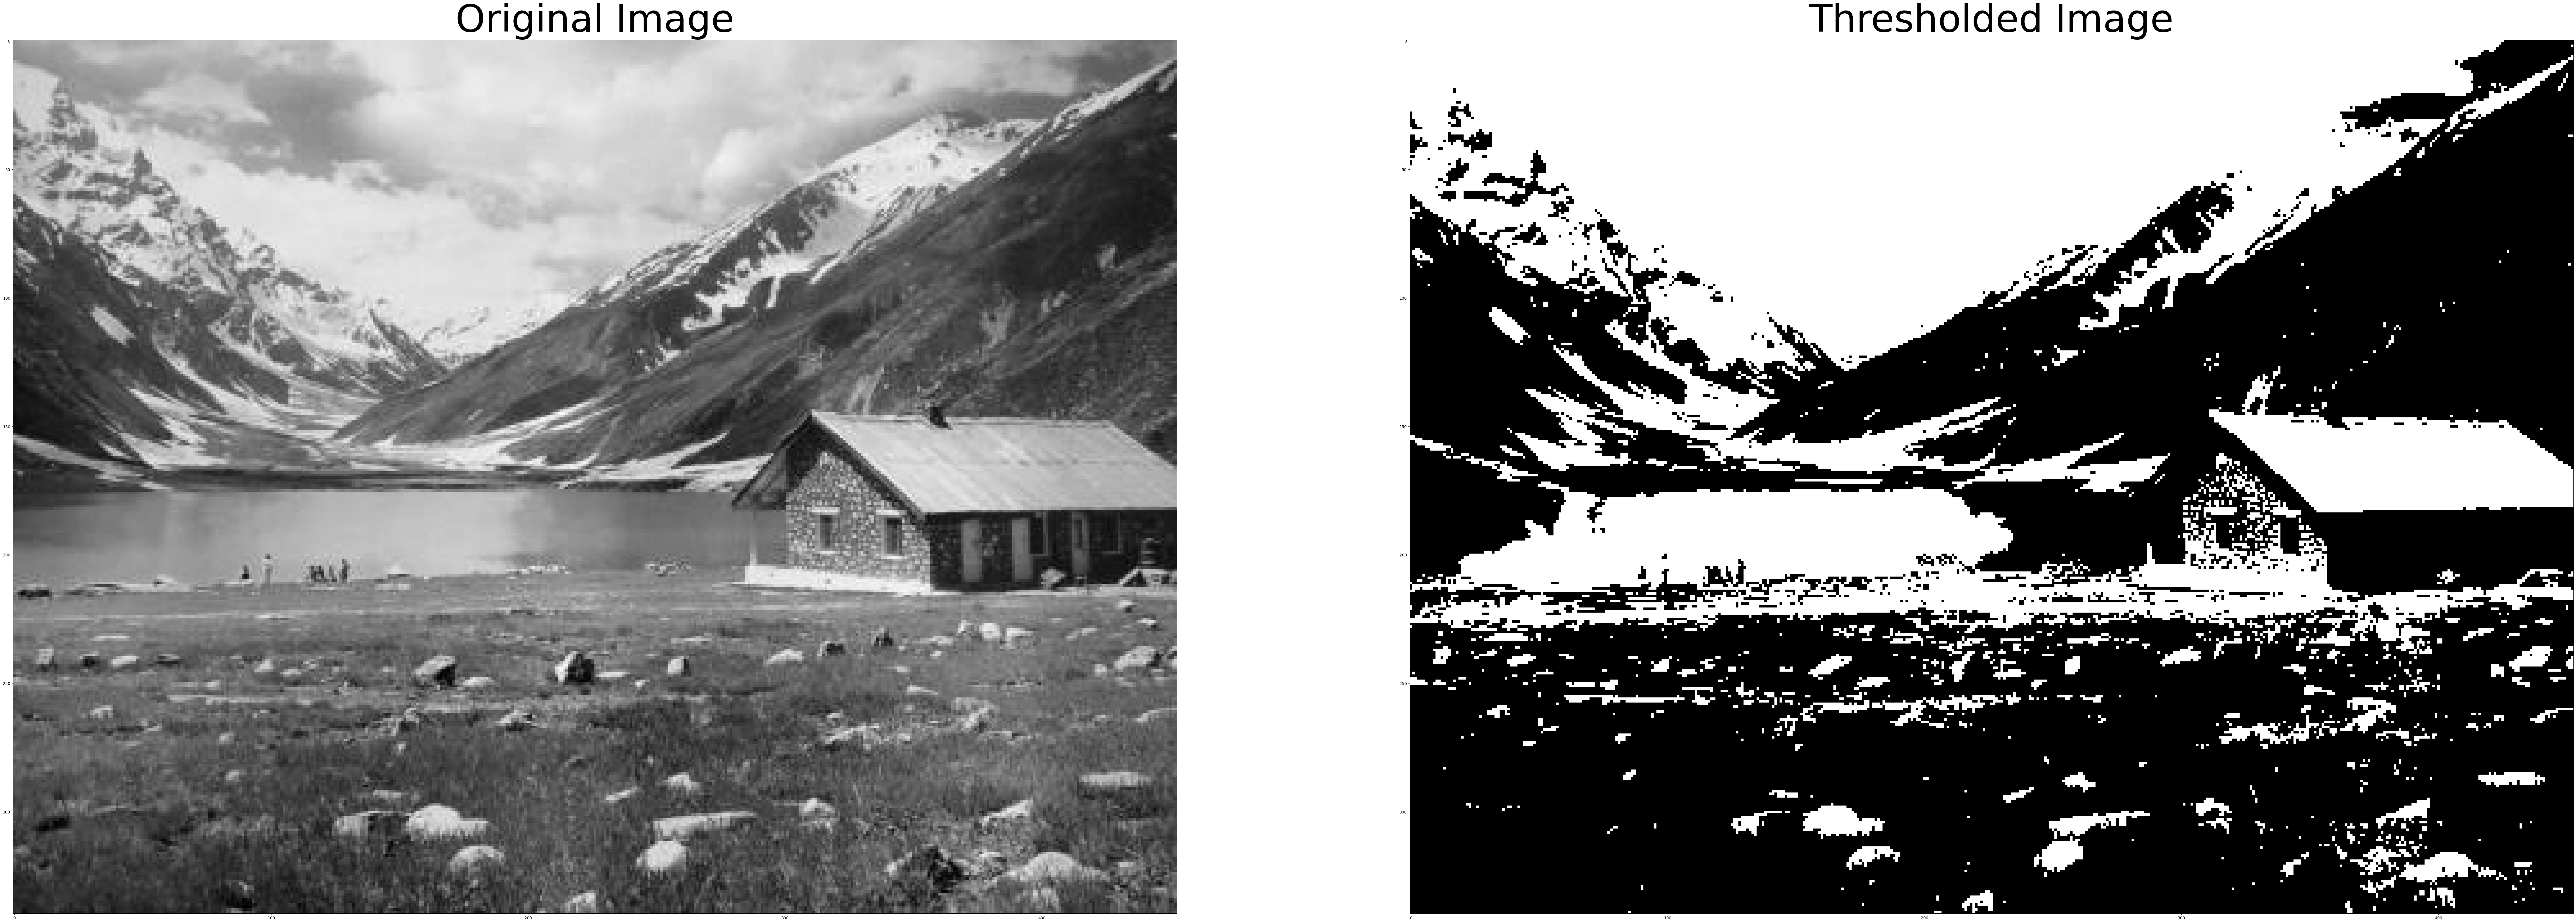

In [75]:
plt.figure(figsize=[180,50])
plt.subplot(131); plt.imshow(base_image_grayscale, cmap="gray"); plt.title("Original Image", fontdict={'fontsize':96});
plt.subplot(132); plt.imshow(image_thresholded, cmap="gray"); plt.title("Thresholded Image", fontdict={'fontsize':96});

In [76]:
sheet_music =cv2.imread('./sheet-music.jpg', cv2.IMREAD_GRAYSCALE)

In [111]:
retVal, image_threshold_global_1 = cv2.threshold(sheet_music, 50, 255, cv2.THRESH_OTSU)
retVal, image_threshold_global_2 = cv2.threshold(sheet_music, 130, 255, cv2.THRESH_BINARY)
image_threshold_adaptive = cv2.adaptiveThreshold(sheet_music, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

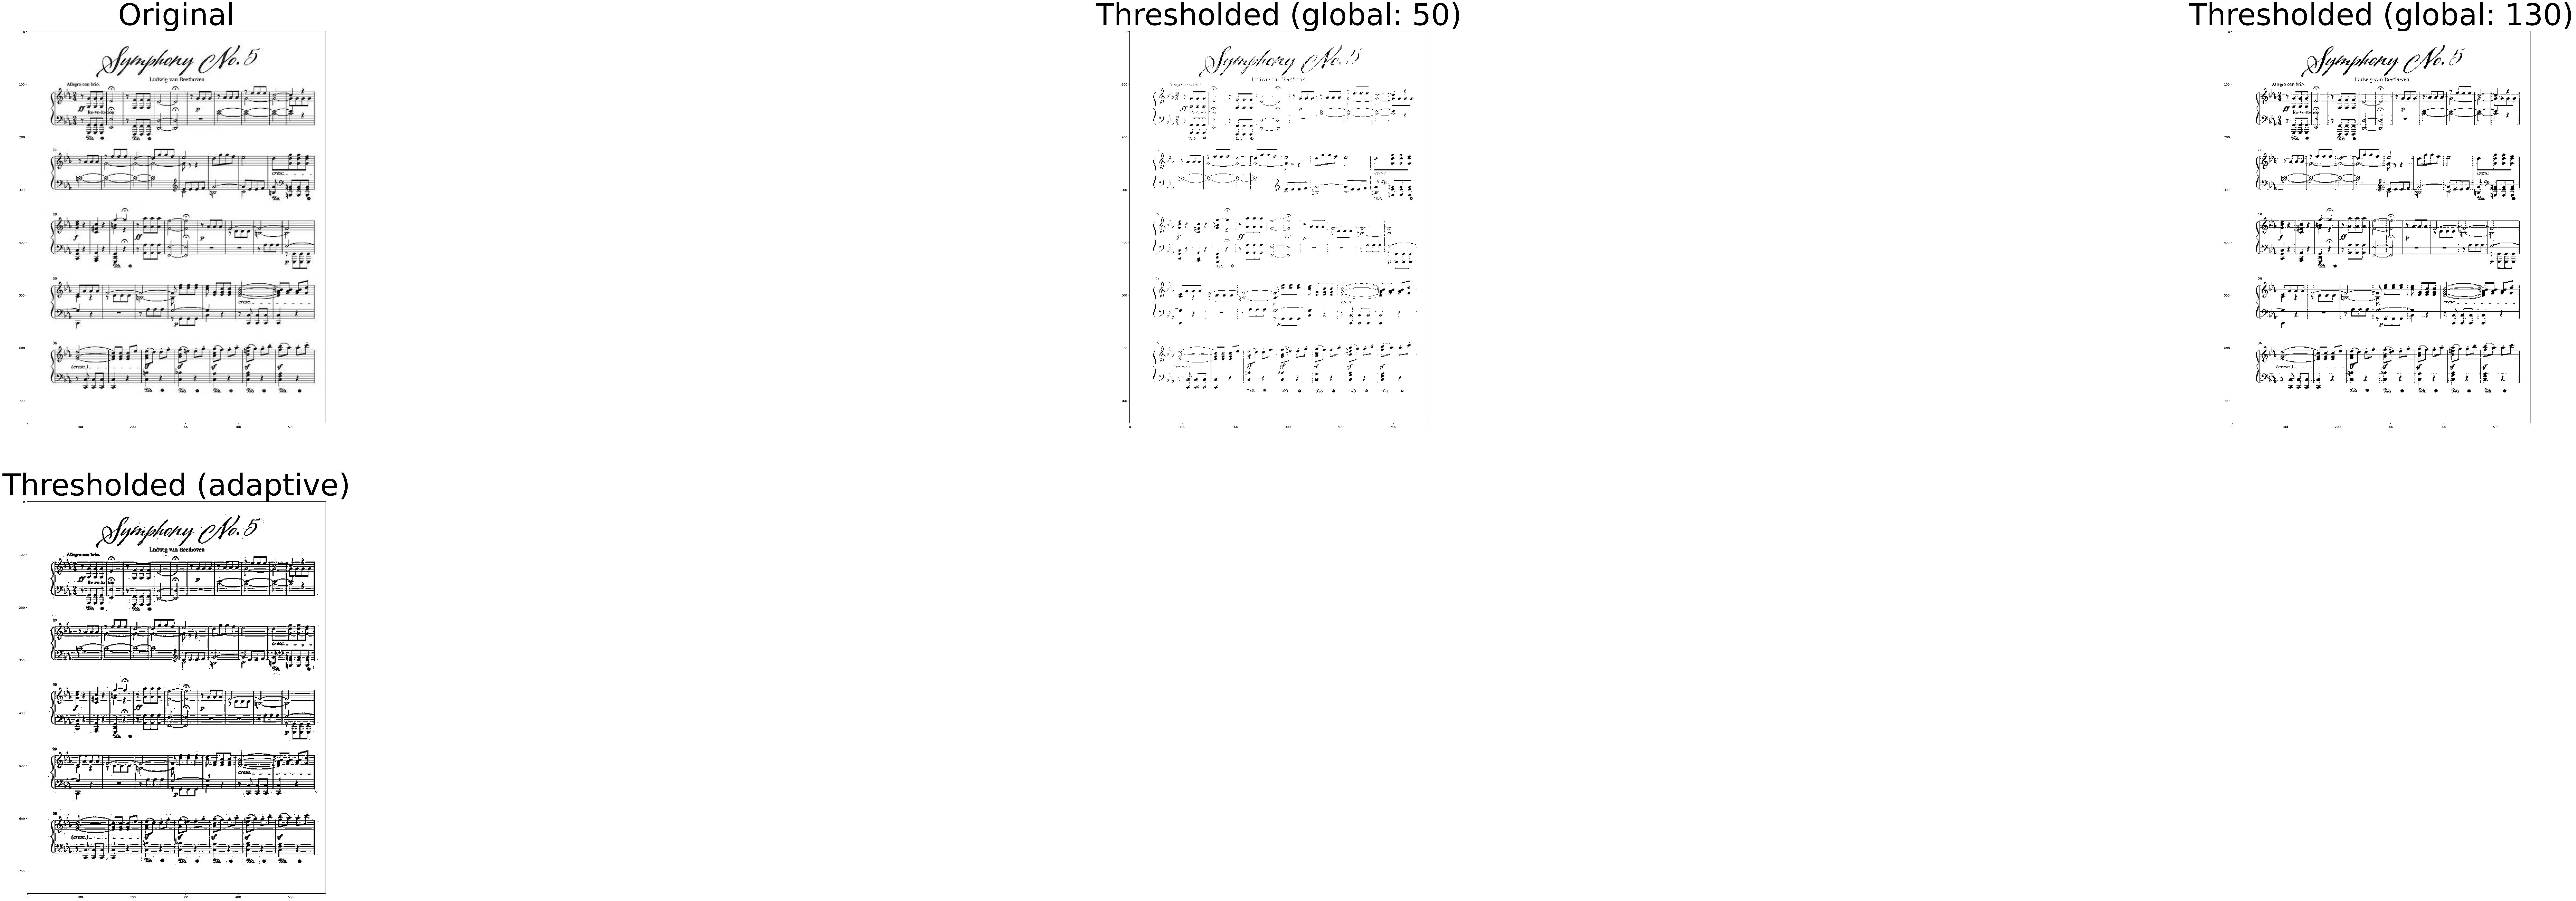

In [87]:
plt.figure(figsize=[180,50])
plt.subplot(231); plt.imshow(sheet_music, cmap="gray"); plt.title("Original", fontdict={'fontsize':96});
plt.subplot(232); plt.imshow(image_threshold_global_1, cmap="gray"); plt.title("Thresholded (global: 50)", fontdict={'fontsize':96});
plt.subplot(233); plt.imshow(image_threshold_global_2, cmap="gray"); plt.title("Thresholded (global: 130)", fontdict={'fontsize':96});
plt.subplot(234); plt.imshow(image_threshold_adaptive, cmap="gray"); plt.title("Thresholded (adaptive)", fontdict={'fontsize':96});

In [94]:
image_rectangle = cv2.imread("./rectangle.jpg", cv2.IMREAD_GRAYSCALE)
image_circle = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

In [95]:
result = cv2.bitwise_and(image_rectangle, image_circle, mask=None)

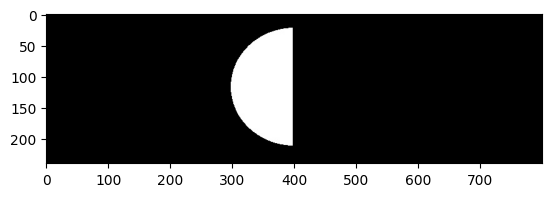

In [96]:
plt.imshow(result, cmap="gray")

In [97]:
bitwise_or_result = cv2.bitwise_or(image_rectangle, image_circle, mask=None)

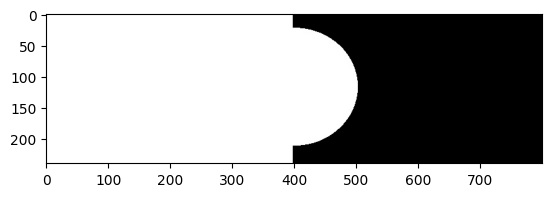

In [98]:
plt.imshow(bitwise_or_result, cmap="gray")

In [100]:
bitwise_xor_result = cv2.bitwise_xor(image_rectangle, image_circle, mask=None)

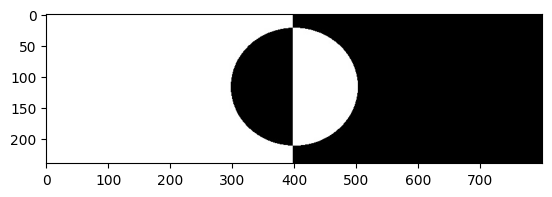

In [102]:
plt.imshow(bitwise_xor_result, cmap="gray")

In [103]:
arr1=np.array([200,250], dtype=np.uint8).reshape(-1,1)
arr2=np.array([40,40], dtype=np.uint8).reshape(-1,1)

In [104]:
add_result = arr1+arr2

In [105]:
add_cv2 = cv2.add(arr1, arr2)

In [106]:
add_result

array([[240],
       [ 34]], dtype=uint8)

In [107]:
add_cv2

array([[240],
       [255]], dtype=uint8)